## Análise de cliques em redes sociais

Aluno: Willian Kenzo


Em uma rede social, o termo "cliques" geralmente se refere a "cliques de rede" ou "cliques sociais". Esses cliques representam grupos de usuários interconectados, onde cada membro do grupo está diretamente conectado a todos os outros membros do grupo. Em outras palavras, em um clique, todos estão conectados entre si. A identificação de um clique é importante para entender a estrutura da rede social. Por exemplo, os cliques podem ser usados para identificar comunidades ou grupos de interesse. Em uma rede social, os cliques também podem ser usados para identificar grupos de usuários que podem ser alvos de um ataque de vírus ou de um ataque de negação de serviço.

### Códigos de auxílio(gerar/verificar)

In [124]:
import networkx as nx
import random
import subprocess



def cria_grafo(num_vertices, probabilidade_conexao):
    # Crie um grafo aleatório densamente conectado
    grafo = nx.fast_gnp_random_graph(num_vertices, probabilidade_conexao)

    # Nome do arquivo de saída
    nome_arquivo = "grafo.txt"

    # Abra o arquivo para escrita
    with open(nome_arquivo, 'w') as arquivo:
        # Escreva a quantidade de vértices e número de arestas na primeira linha
        arquivo.write(f"{num_vertices} {grafo.number_of_edges()}\n")

        # Escreva as arestas no formato de lista de adjacência
        for aresta in grafo.edges():
            arquivo.write(f"{aresta[0]+1} {aresta[1]+1}\n")  # +1 para ajustar os índices (começando em 1)

    print(f"Grafo densamente conectado gerado e salvo em '{nome_arquivo}'.")



    # Nome do arquivo de entradapara paralelizar parte do processo, especificamente as iterações sobre os vértices. A diretiva #pragma omp parallel for é usada para paralelizar o loop, e #pra
    # Nome do arquivo de entrada
    nome_arquivo = "grafo.txt"

    # Abrir o arquivo e pular a primeira linha
    with open(nome_arquivo, 'r') as arquivo:
        next(arquivo)  # Pula a primeira linha

        # Lê o grafo a partir das linhas restantes
        G = nx.parse_adjlist(arquivo)

    # Encontrar todas as cliques maximais
    cliques_maximais = list(nx.find_cliques(G))
    clique_maxima = max(cliques_maximais, key=len)
    tamamho_maxima = len(clique_maxima)

    possiveis_cliques = []
    print(f"Cliques maximais encontradas de tamanho {tamamho_maxima}: ")
    for  clique in cliques_maximais:
        if len(clique) == tamamho_maxima:
            clique = sorted([int(number) for number in clique])
            print(clique)
            possiveis_cliques.append(clique)

    return tamamho_maxima, possiveis_cliques


In [125]:
import networkx as nx
import random


def cria_grafo_sem_print(num_vertices, probabilidade_conexao):
    # Crie um grafo aleatório densamente conectado
    grafo = nx.fast_gnp_random_graph(num_vertices, probabilidade_conexao)

    # Nome do arquivo de saída
    nome_arquivo = "grafo.txt"

    # Abra o arquivo para escrita
    with open(nome_arquivo, 'w') as arquivo:
        # Escreva a quantidade de vértices e número de arestas na primeira linha
        arquivo.write(f"{num_vertices} {grafo.number_of_edges()}\n")

        # Escreva as arestas no formato de lista de adjacência
        for aresta in grafo.edges():
            arquivo.write(f"{aresta[0]+1} {aresta[1]+1}\n")  # +1 para ajustar os índices (começando em 1)



## Abordagem Exaustiva


In [126]:
%%writefile abordagemExaustiva.cpp
#include <iostream>
#include <fstream>
#include <omp.h>
#include <vector>
using namespace std;


// Function declaration
void BuscaExaustiva(std::vector<std::vector<int>>& grafo, int numVertices,
                    std::vector<int>& cliqueAtual, std::vector<int>& melhorClique,
                    int verticeAtual);


std::vector<int> EncontrarCliqueMaxima(std::vector<std::vector<int>>& grafo, int numVertices) {
    std::vector<int> cliqueMaxima;
    std::vector<int> melhorClique;

    BuscaExaustiva(grafo, numVertices, cliqueMaxima, melhorClique, 0);

    return melhorClique;
}

void BuscaExaustiva(std::vector<std::vector<int>>& grafo, int numVertices,
                    std::vector<int>& cliqueAtual, std::vector<int>& melhorClique,
                    int verticeAtual) {
    if (verticeAtual == numVertices) {
        // Verifica se a clique atual é maior que a melhor encontrada até agora
        if (cliqueAtual.size() > melhorClique.size()) {
            melhorClique = cliqueAtual;
        }
        return;
    }

    // Tenta adicionar o vértice atual 
    bool podeAdicionar = true;
    for (int u : cliqueAtual) {
        if (grafo[u][verticeAtual] == 0) {
            podeAdicionar = false;
            break;
        }
    }

    if (podeAdicionar) {
        cliqueAtual.push_back(verticeAtual);
        BuscaExaustiva(grafo, numVertices, cliqueAtual, melhorClique, verticeAtual + 1);
        cliqueAtual.pop_back(); // Volta ao estado anterior
    }

    // Continua a busca sem adicionar o vértice atual à clique atual
    BuscaExaustiva(grafo, numVertices, cliqueAtual, melhorClique, verticeAtual + 1);
}

  std::vector<std::vector<int>> LerGrafo(const std::string& nomeArquivo, int& numVertices) {
    std::ifstream arquivo(nomeArquivo);
    int numArestas;
    arquivo >> numVertices >> numArestas;

    std::vector<std::vector<int>> grafo(numVertices, std::vector<int>(numVertices, 0));

    for (int i = 0; i < numArestas; ++i) {
        int u, v;
        arquivo >> u >> v;
        grafo[u - 1][v - 1] = 1;
        grafo[v - 1][u - 1] = 1;  // O grafo é não direcionado
    }

    arquivo.close();

    return grafo;
}


int main(int numVertices, char* argv[]){

  vector<vector<int>> grafo;

  grafo = LerGrafo("grafo.txt", numVertices);
  
  double tdata = omp_get_wtime();

  std::vector<int> cliqueMax = EncontrarCliqueMaxima(grafo, numVertices);

  tdata = omp_get_wtime() - tdata;



  std::cout << "Clique Máxima: ";
  for (auto it = cliqueMax.begin(); it != cliqueMax.end(); ++it) {
    std::cout << *it + 1 << " ";
}
  std::cout << std::endl;
  cout << "Clique máxima encontrada de tamanho: " << cliqueMax.size() <<endl;     ;
  cout << "Duração: " << tdata << endl;
  cout << endl;



  return 0;
}

Overwriting abordagemExaustiva.cpp


In [127]:
tamanho_maximo, possiveis_cliques = cria_grafo(100, 0.5)

Grafo densamente conectado gerado e salvo em 'grafo.txt'.
Cliques maximais encontradas de tamanho 9: 
[20, 41, 46, 52, 60, 62, 84, 99, 100]
[20, 35, 41, 46, 52, 60, 62, 99, 100]
[2, 20, 35, 41, 46, 60, 62, 85, 100]
[20, 41, 52, 60, 62, 84, 90, 99, 100]
[20, 41, 42, 52, 60, 84, 90, 99, 100]
[20, 27, 42, 47, 60, 84, 91, 99, 100]
[20, 27, 42, 47, 60, 84, 90, 99, 100]
[20, 27, 33, 42, 47, 60, 84, 90, 99]
[20, 27, 41, 42, 60, 84, 90, 99, 100]
[4, 15, 17, 18, 26, 67, 72, 74, 85]
[16, 20, 34, 35, 41, 71, 82, 85, 96]
[1, 9, 31, 32, 37, 54, 71, 72, 85]
[1, 32, 37, 49, 54, 71, 72, 85, 93]
[15, 17, 21, 25, 33, 61, 68, 70, 79]
[15, 17, 21, 25, 30, 33, 61, 68, 70]
[15, 17, 21, 25, 30, 33, 61, 70, 95]
[10, 17, 25, 30, 33, 44, 61, 70, 90]
[9, 30, 31, 34, 37, 54, 71, 72, 85]
[1, 9, 30, 31, 37, 54, 71, 72, 85]


In [128]:
%%bash
g++ -Wall -o3 -g -fopenmp abordagemExaustiva.cpp -o abordagemExaustiva 
./abordagemExaustiva tamanho_maximo 

Clique Máxima: 1 9 30 31 37 54 71 72 85 
Clique máxima encontrada de tamanho: 9
Duração: 0.0903164



## Checando confiabilidade da abordagemExaustiva:

In [129]:
lista_tamanho_encontrado_exaustiva = []
lista_tamanhoMax_grafo = []
for i in range(10, 150, 1):
    tamanho_maximo_python, lista_cliques = cria_grafo(i, 0.7)    
    lista_tamanhoMax_grafo.append(tamanho_maximo_python)
    command = f'./abordagemExaustiva {i}'
    with open("resultadosExaustivaConfi.txt", "w") as output_file:
        subprocess.run(command, shell=True, stdout=output_file)
    with open("resultadosExaustivaConfi.txt", "r") as input_file:
        for line in input_file:
            if line.startswith("Clique máxima encontrada de tamanho:"):
                tamanho_encontrado = line.split(":")[1]
                lista_tamanho_encontrado_exaustiva.append(tamanho_encontrado)
    


Grafo densamente conectado gerado e salvo em 'grafo.txt'.
Cliques maximais encontradas de tamanho 6: 
[2, 3, 5, 7, 9, 10]
[2, 3, 4, 7, 9, 10]
Grafo densamente conectado gerado e salvo em 'grafo.txt'.
Cliques maximais encontradas de tamanho 6: 
[2, 3, 4, 9, 10, 11]
Grafo densamente conectado gerado e salvo em 'grafo.txt'.
Cliques maximais encontradas de tamanho 5: 
[4, 5, 6, 7, 11]
[2, 4, 5, 6, 7]
[4, 5, 6, 8, 11]
[5, 6, 7, 9, 11]
[5, 6, 8, 9, 11]
[1, 4, 5, 7, 11]
[1, 2, 4, 5, 7]
[1, 4, 5, 8, 11]
[1, 5, 7, 9, 11]
[1, 5, 8, 9, 11]
[5, 7, 9, 10, 11]
[5, 8, 9, 10, 11]
Grafo densamente conectado gerado e salvo em 'grafo.txt'.
Cliques maximais encontradas de tamanho 7: 
[3, 5, 6, 7, 8, 11, 12]
[4, 5, 6, 7, 8, 11, 12]
[2, 3, 6, 7, 8, 11, 12]
[2, 4, 6, 7, 8, 9, 13]
[2, 4, 6, 7, 8, 11, 12]
[2, 4, 6, 7, 8, 9, 11]
Grafo densamente conectado gerado e salvo em 'grafo.txt'.
Cliques maximais encontradas de tamanho 6: 
[3, 4, 8, 9, 10, 11]
[2, 3, 6, 7, 13, 14]
[1, 3, 8, 12, 13, 14]
[3, 8, 11, 12, 13, 

In [130]:
int_list = [int(s.strip()) for s in lista_tamanho_encontrado_exaustiva]

if int_list == lista_tamanho_encontrado_exaustiva:
    print("Valores de cliques máximos encontrados iguais")
    print(int_list)
    print(lista_tamanhoMax_grafo)
else:
    print("Valores de cliques máximos encontrado diferentes")

Valores de cliques máximos encontrado diferentes


Como pode ser vista nos prints acima, os valores de cliques máximos encontrados são iguais, o que indica que o algoritmo está correto.

## Abordagem Gulosa com OMP

A heurística gulosa é um método de resolução de problemas que faz escolhas locais otimizadas em cada estágio com a espera de encontrar uma solução global ótima. A heurística gulosa é um algoritmo de aproximação, ou seja, um algoritmo que encontra uma solução aproximada para um problema de otimização, produzindo uma solução viável onde a ótima não é conhecida ou não é fácil de encontrar. Ela acaba sendo uma boa alternativa para problemas NP-difíceis, onde não é possível encontrar uma solução ótima em um tempo razoável, mas é possível encontrar uma solução aproximada em um tempo razoável.

In [131]:
tamanho_gulosa, possiveis_cliques = cria_grafo(100, 0.5)

Grafo densamente conectado gerado e salvo em 'grafo.txt'.
Cliques maximais encontradas de tamanho 10: 
[12, 16, 21, 22, 35, 64, 70, 71, 83, 93]


In [ ]:
%%writefile abordagemGulosaOMP

#include <iostream>
#include <fstream>
#include <omp.h>
#include <vector>
using namespace std;

// Function to find the maximum clique in a graph
std::vector<int> EncontrarCliqueMaxima(std::vector<std::vector<int>>& grafo, int numVertices) {
    // Initialize vectors to store the maximum clique and candidates
    std::vector<int> cliqueMaxima;
    std::vector<int> candidatos;

    // Initialize the candidates vector with all vertices
    for (int i = 0; i < numVertices; ++i) {
        candidatos.push_back(i);
    }

    // Iterate until there are no more candidates
    while (!candidatos.empty()) {
        // Get the last candidate
        int v = candidatos.back();
        candidatos.pop_back();

        // Flag to check if the current vertex can be added to the clique
        bool podeAdicionar = true;

        // Check adjacency with vertices in the current clique in parallel
        #pragma omp parallel for
        for (int u : cliqueMaxima) {
            if (grafo[u][v] == 0) {
                #pragma omp critical
                {
                    podeAdicionar = false;
                }
            }
        }

        // If the current vertex can be added to the clique
        if (podeAdicionar) {
            // Add the vertex to the clique in a critical section
            #pragma omp critical
            {
                cliqueMaxima.push_back(v);
            }

            // Initialize a vector for new candidates
            std::vector<int> novosCandidatos;

            // Check adjacency with the remaining candidates in parallel
            #pragma omp parallel for
            for (int u : candidatos) {
                bool adjacenteATodos = true;

                // Check adjacency with vertices in the current clique
                for (int c : cliqueMaxima) {
                    if (grafo[u][c] == 0) {
                        adjacenteATodos = false;
                        break;
                    }
                }

                // If adjacent to all vertices in the current clique, add to new candidates
                if (adjacenteATodos) {
                    #pragma omp critical
                    {
                        novosCandidatos.push_back(u);
                    }
                }
            }

            // Update the candidates vector in a critical section
            #pragma omp critical
            {
                candidatos = novosCandidatos;
            }
        }
    }

    return cliqueMaxima;
}

// Function to read a graph from a file
std::vector<std::vector<int>> LerGrafo(const std::string& nomeArquivo, int& numVertices) {
    std::ifstream arquivo(nomeArquivo);
    int numArestas;
    arquivo >> numVertices >> numArestas;

    std::vector<std::vector<int>> grafo(numVertices, std::vector<int>(numVertices, 0));

    // Read edges from the file and update the adjacency matrix
    for (int i = 0; i < numArestas; ++i) {
        int u, v;
        arquivo >> u >> v;
        grafo[u - 1][v - 1] = 1;
        grafo[v - 1][u - 1] = 1;  // The graph is undirected
    }

    arquivo.close();

    return grafo;
}

int main(int numVertices, char* argv[]) {
    // Read the graph from a file
    vector<vector<int>> grafo;
    grafo = LerGrafo("grafo.txt", numVertices);

    // Measure the execution time of finding the maximum clique
    double tdata = omp_get_wtime();
    std::vector<int> cliqueMax = EncontrarCliqueMaxima(grafo, numVertices);
    tdata = omp_get_wtime() - tdata;

    // Print the maximum clique
    std::cout << "Clique Máxima: ";
    for (auto it = cliqueMax.rbegin(); it != cliqueMax.rend(); ++it) {
        std::cout << *it + 1 << " ";
    }

    // Print the size of the maximum clique and the duration of the computation
    std::cout << std::endl;
    cout << "Clique máxima encontrada de tamanho:" << cliqueMax.size() << endl;
    cout << "Duração: " << tdata << endl;
    cout << endl;

    return 0;
}


In [132]:
%%bash
g++ -Wall -o3 -g -fopenmp abordagemGulosaOMP.cpp -o abordagemGulosaOMP
./abordagemGulosaOMP 100

Clique Máxima: 27 90 52 25 99 100 
Clique máxima encontrada de tamanho:6
Duração: 0.000292322



In [133]:
lista_tamanho_encontrado_gulosa = []
lista_tamanhoMax_grafo = []
for i in range(10, 100, 5):
    tamanho_maximo_python, lista_cliques = cria_grafo(i, 0.7)    
    lista_tamanhoMax_grafo.append(tamanho_maximo_python)
    command = f'./abordagemGulosaOMP {i}'
    with open("resultadosExaustivaConfi.txt", "w") as output_file:
        subprocess.run(command, shell=True, stdout=output_file)
    with open("resultadosExaustivaConfi.txt", "r") as input_file:
        for line in input_file:
            if line.startswith("Clique máxima encontrada de tamanho:"):
                tamanho_encontrado = line.split(":")[1]
                lista_tamanho_encontrado_gulosa.append(tamanho_encontrado)
    


Grafo densamente conectado gerado e salvo em 'grafo.txt'.
Cliques maximais encontradas de tamanho 6: 
[3, 4, 5, 6, 9, 10]
Grafo densamente conectado gerado e salvo em 'grafo.txt'.
Cliques maximais encontradas de tamanho 6: 
[3, 6, 7, 10, 11, 14]
Grafo densamente conectado gerado e salvo em 'grafo.txt'.
Cliques maximais encontradas de tamanho 8: 
[1, 5, 6, 7, 9, 17, 18, 19]
[3, 4, 8, 9, 10, 15, 19, 20]
Grafo densamente conectado gerado e salvo em 'grafo.txt'.
Cliques maximais encontradas de tamanho 8: 
[2, 3, 5, 6, 11, 12, 21, 24]
[2, 3, 5, 11, 12, 17, 21, 24]
[2, 3, 5, 11, 12, 17, 19, 21]
[2, 3, 5, 12, 15, 17, 19, 21]
[2, 3, 5, 6, 12, 15, 21, 24]
[2, 3, 5, 12, 15, 17, 21, 24]
Grafo densamente conectado gerado e salvo em 'grafo.txt'.
Cliques maximais encontradas de tamanho 9: 
[2, 3, 7, 13, 14, 20, 23, 24, 26]
[2, 7, 11, 13, 14, 20, 23, 24, 26]
[2, 7, 10, 11, 14, 20, 23, 24, 26]
[2, 3, 7, 14, 15, 20, 23, 24, 26]
Grafo densamente conectado gerado e salvo em 'grafo.txt'.
Cliques maximais 

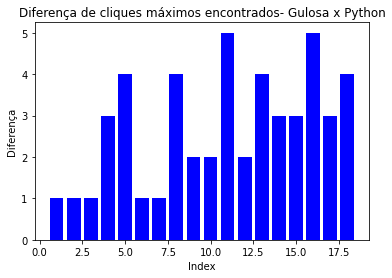

In [134]:
import matplotlib.pyplot as plt
# Calculate the differences between corresponding values in the two lists
int_list_gulosa = [int(s.strip()) for s in lista_tamanho_encontrado_gulosa]

differences = [lista_tamanhoMax_grafo[i] - int_list_gulosa[i] for i in range(len(int_list_gulosa))]

# Create a bar graph to visualize the differences
plt.bar(range(1, len(int_list_gulosa) + 1), differences, color='blue')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Diferença')
plt.title('Diferença de cliques máximos encontrados- Gulosa x Python')

# Show the plot
plt.show()

Como podemos ver no gráfico acima a difenreça entre cliques máximos encontrados durante a procura pode ser grande, mas a diferença entre o tempo de execução acaba sendo bem significativo como poderemos ver nos gráficos abaixo. A abordagem gulosa é muito mais rápida que a abordagem exaustiva, mas não garante que a solução encontrada seja a melhor possível. Algo que podemos fazer para tentar melhorar a solução encontrada é introduzir uma certa aleatoriedade nele, permitindo que ele explore mais o espaço de soluções, trazendo uma abordagem mais exploratória.

## Gerando gráficos de comparação 

In [149]:
with open("resultadosExaustiva.txt", "w") as output_file:
    pass
with open("resultadosGulosa.txt", "w") as output_file:
    pass

In [150]:

vertices = []
for i in range(10, 120, 5):
    tamanho = cria_grafo_sem_print(i, 0.7)    
    command = f'./abordagemExaustiva {i}'
    with open("resultadosExaustiva.txt", "a") as output_file:
        subprocess.run(command, shell=True, stdout=output_file)

    command = f'./abordagemGulosaOMP {i}'
    with open("resultadosGulosa.txt", "a") as output_file:
        subprocess.run(command, shell=True, stdout=output_file)
    vertices.append(i)

timeExaustiva = []
timeGulosa = []

with open("resultadosExaustiva.txt", "r") as input_file:
    for line in input_file:
        if "Duração: " in line:
            timeExaustiva.append(float(line.split(" ")[1]))

with open("resultadosGulosa.txt", "r") as input_file:
    for line in input_file:
        if "Duração: " in line:
            timeGulosa.append(float(line.split(" ")[1]))



In [156]:
import plotly.express as px
import pandas as pd  # You need to import Pandas for working with dataframes

# Create a Pandas DataFrame
data = {'vertices': vertices, 'tempoExaustiva': timeExaustiva, 'tempoGulosa': timeGulosa}
df = pd.DataFrame(data)
# Create a scatter plot with trendline using Plotly Express
fig = px.scatter(df, x="vertices", y=["tempoGulosa"], trendline="lowess", trendline_options=dict(frac=0.1))

# Update layout for better appearance and interactivity
fig.update_layout(
    title="Tempo x Número de Vértices (Gulosa)",
    xaxis_title="Números de Vértices",
    yaxis_title="Tempo (segundos)",
    hovermode="closest",  # Show closest data point on hover
    template="seaborn",  # Dark theme
)

# Show the plot
fig.show()

Como pode ser visto no gráfico acima, o tempo de execução da heurística gulosa acaba não aumentando muito com o aumento do número de vértices, entretanto também se percebe uma grande diferença entre o tempo de execução dependendo da entrada do arquivo, que como pode ser visto no gráfico, em alguns vértices mesmo a tendência sendo de aumento, o tempo de execução acaba sendo menor.

## Comparação de execução entre as duas abordagens

In [157]:
import plotly.express as px
import pandas as pd  # You need to import Pandas for working with dataframes


# Create a scatter plot with trendline using Plotly Express
fig = px.scatter(df, x="vertices", y=["tempoExaustiva", "tempoGulosa"], trendline="lowess", trendline_options=dict(frac=0.1))

# Update layout for better appearance and interactivity
fig.update_layout(
    title="Tempo x Número de Vértices (Exaustiva x Gulosa)",
    xaxis_title="Números de Vértices",
    yaxis_title="Tempo (segundos)",
    hovermode="closest",  # Show closest data point on hover
    template="seaborn",  # Dark theme
)

# Show the plot
fig.show()

Como podemos ver no gráfico acima, a abordagem gulosa é muito mais rápida que a abordagem exaustiva, ainda mais quanto maior o número de vértices, entretanto a abordagem gulosa não garante que a solução encontrada seja a melhor possível, o que muitas vezes gera uma questão de esoclha entre tempo de execução e solução ótima.

# MPI - Paralelização e distribuição de processamento

In [ ]:
#include <iostream>
#include <fstream>
#include <vector>
#include <mpi.h>

using namespace std;


void BuscaExaustiva(std::vector<std::vector<int>>& grafo, int numVertices,
                    std::vector<int>& cliqueAtual, std::vector<int>& melhorClique,
                    int verticeAtual, int startVertex, int endVertex); 

std::vector<int> EncontrarCliqueMaxima(std::vector<std::vector<int>>& grafo, int numVertices, MPI_Comm comm) {
    int rank, size;
    MPI_Comm_rank(comm, &rank);
    MPI_Comm_size(comm, &size);

    int verticesPerProcess = numVertices / size;
    int remainder = numVertices % size;

    int startVertex = rank * verticesPerProcess;
    int endVertex = (rank == size - 1) ? (startVertex + verticesPerProcess + remainder) : (startVertex + verticesPerProcess);

    std::vector<int> cliqueMaxima;
    std::vector<int> melhorClique;

    BuscaExaustiva(grafo, numVertices, cliqueMaxima, melhorClique, 0, startVertex, endVertex);

    if (rank == 0) {
        std::vector<int> tempClique(melhorClique.size());
        MPI_Gather(melhorClique.data(), melhorClique.size(), MPI_INT, tempClique.data(), melhorClique.size(), MPI_INT, 0, comm);

        for (int i = 0; i < size; ++i) {
            if (tempClique[i * melhorClique.size()] > melhorClique.size()) {
                melhorClique.assign(tempClique.begin() + i * melhorClique.size(),
                                    tempClique.begin() + (i + 1) * melhorClique.size());
            }
        }
    } else {
        MPI_Gather(melhorClique.data(), melhorClique.size(), MPI_INT, nullptr, 0, MPI_INT, 0, comm);
    }

    return melhorClique;
}

void BuscaExaustiva(std::vector<std::vector<int>>& grafo, int numVertices,
                    std::vector<int>& cliqueAtual, std::vector<int>& melhorClique,
                    int verticeAtual, int startVertex, int endVertex) {
    if (verticeAtual == numVertices) {
        if (cliqueAtual.size() > melhorClique.size()) {
            melhorClique = cliqueAtual;
        }
        return;
    }

    bool podeAdicionar = true;
    for (int u : cliqueAtual) {
        if (grafo[u][verticeAtual] == 0) {
            podeAdicionar = false;
            break;
        }
    }

    if (podeAdicionar) {
        cliqueAtual.push_back(verticeAtual);
        BuscaExaustiva(grafo, numVertices, cliqueAtual, melhorClique, verticeAtual + 1, startVertex, endVertex);
        cliqueAtual.pop_back(); 
    }

    BuscaExaustiva(grafo, numVertices, cliqueAtual, melhorClique, verticeAtual + 1, startVertex, endVertex);
}

std::vector<std::vector<int>> LerGrafo(const std::string& nomeArquivo, int& numVertices) {
    std::ifstream arquivo(nomeArquivo);
    int numArestas;
    arquivo >> numVertices >> numArestas;

    std::vector<std::vector<int>> grafo(numVertices, std::vector<int>(numVertices, 0));

    for (int i = 0; i < numArestas; ++i) {
        int u, v;
        arquivo >> u >> v;
        grafo[u - 1][v - 1] = 1;
        grafo[v - 1][u - 1] = 1;  
    }

    arquivo.close();

    return grafo;
}

int main(int argc, char* argv[]) {
    MPI_Init(&argc, &argv);

    int numVertices;
    vector<vector<int>> grafo;

    if (argc != 2) {
        cout << "Usage: " << argv[0] << " <graph_file>" << endl;
        MPI_Finalize();
        return 1;
    }

    grafo = LerGrafo(argv[1], numVertices);
 
    MPI_Comm comm = MPI_COMM_WORLD;

    double tdata = MPI_Wtime();

    std::vector<int> cliqueMax = EncontrarCliqueMaxima(grafo, numVertices, comm);

    tdata = MPI_Wtime() - tdata;

    int rank;
    MPI_Comm_rank(comm, &rank);

    if (rank == 0) {
        std::cout << "Clique Máxima: ";
        for (auto it = cliqueMax.begin(); it != cliqueMax.end(); ++it) {
            std::cout << *it + 1 << " ";
        }
        std::cout << std::endl;
        cout << "Clique máxima encontrada de tamanho " << cliqueMax.size() << endl;
        cout << "Duração: " << tdata << endl;
        cout << endl;
    }

    MPI_Finalize();

    return 0;
}


Script para slurm de 1 cores

In [141]:
%%writefile abordagemExaustivaMPI1Core.slurm
#!/bin/bash
#SBATCH -n 1
#SBATCH --time=00:10:00
#SBATCH --partition=normal

mpirun -np 1 ./abordagemExaustivaMPI entrada

Writing abordagemExaustivaMPI1Core.slurm


Script para 6 cores

In [ ]:
%%writefile abordagemExaustivaMPI6Core
#!/bin/bash
#SBATCH -n 6
#SBATCH --time=00:10:00
#SBATCH --partition=normal

mpirun --allow-run-as-root -np 6 ./abordagemExaustivaMPI entrada

Compilação do código e execução

In [ ]:

mpic++ -o mpi abordagemExaustivaMPI.cpp

In [ ]:
sbatch mpi.slurm

## Comparando resultados da Exaustiva e Exaustiva com MPI

| Vértices | Exaustiva(s) | MPI 1 Core(s) | MPI 6 Core(s) |  
|----------|----------|----------|----------|
| 50 | 0.06 | 0.11 | 0.12 |
| 100 | 13.21 | 9.64 | 5.50 |
|  150 | 294.53 | 163.31 | 100.72 |

Como podemos ver na tabela acima, em entradas pequenas acaba sendo mais lenta que a abordagem exaustiva normal, já que o tempo de comunicação acaba sendo maior que o tempo de execução do algoritmo. Entretanto, em entradas maiores, o tempo de execução acaba sendo menor que o tempo de comunicação, o que acaba tornando a abordagem exaustiva com MPI mais rápida que a abordagem exaustiva normal.